In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [103]:
df= pd.read_csv("/Users/sushilkumar/Desktop/Mall_Customers.csv")

In [104]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [105]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


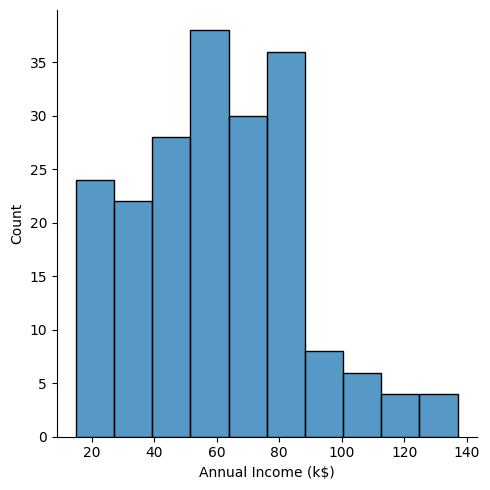

In [106]:
sns.displot(df["Annual Income (k$)"]);

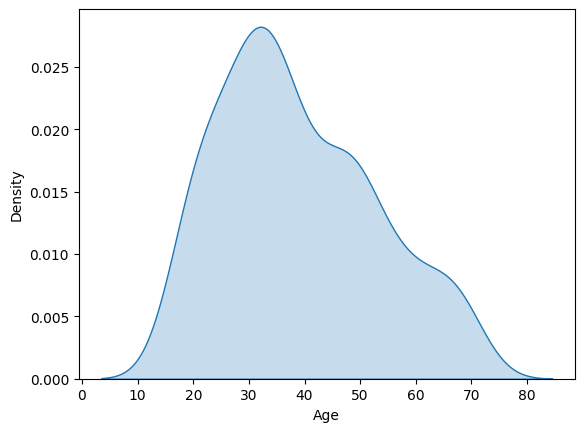

In [107]:
x=df['Age'];
sns.kdeplot(df['Age'],shade= True);

In [108]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

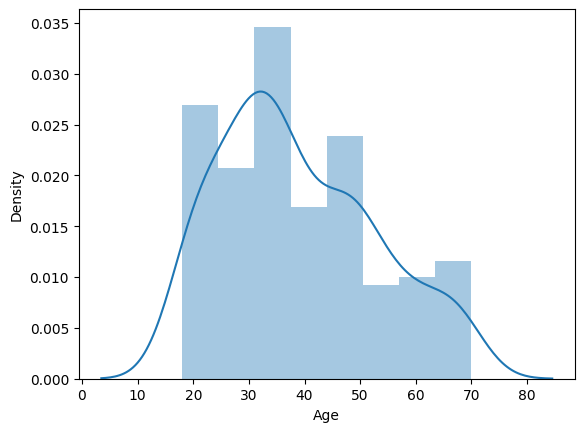

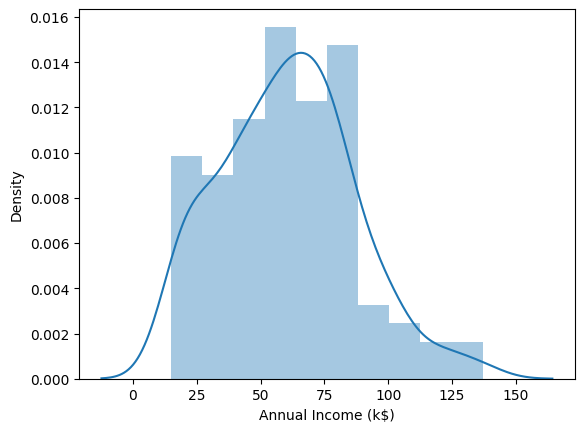

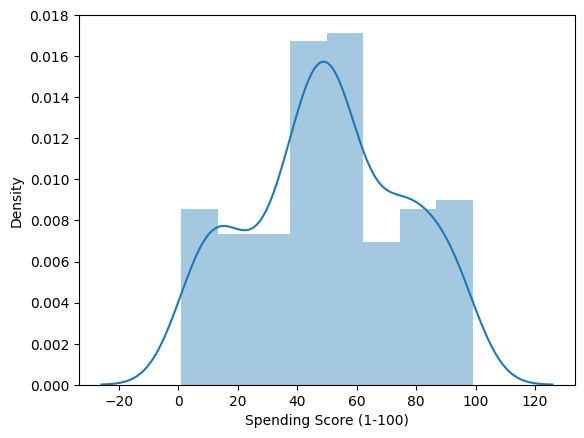

In [109]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in column:
    plt.figure()
    sns.distplot(df[i]);

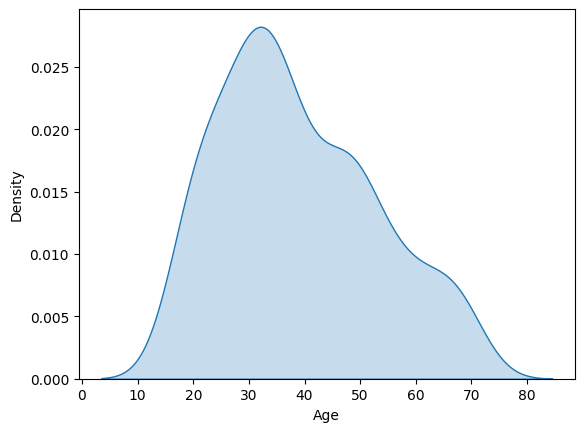

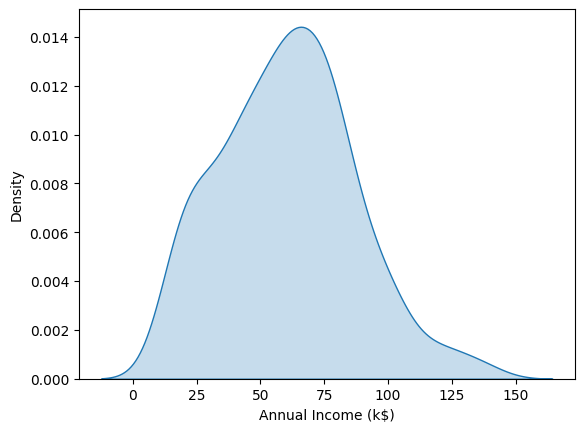

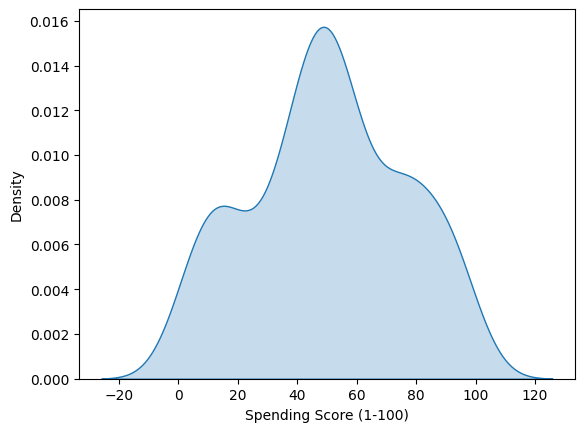

In [111]:
column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sns.kdeplot(df[i], shade=True)

    

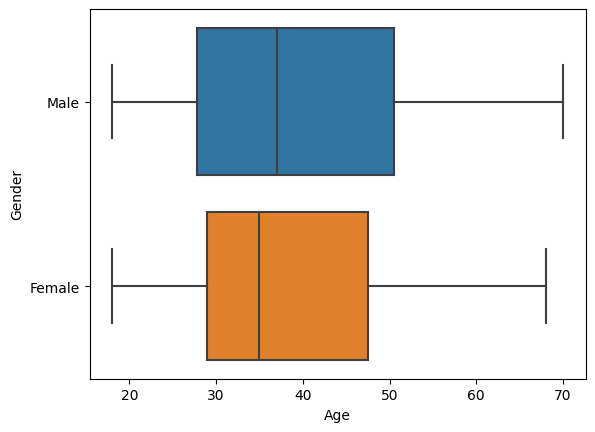

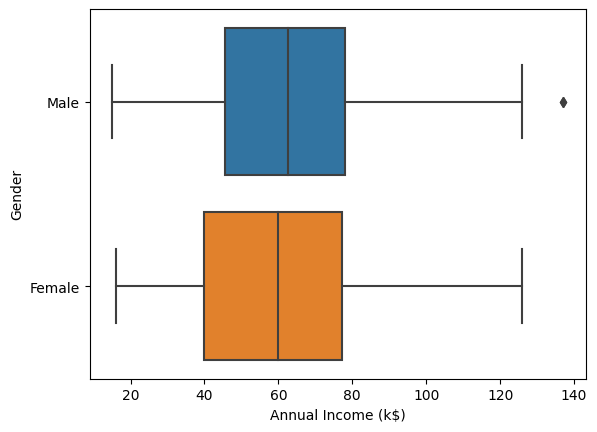

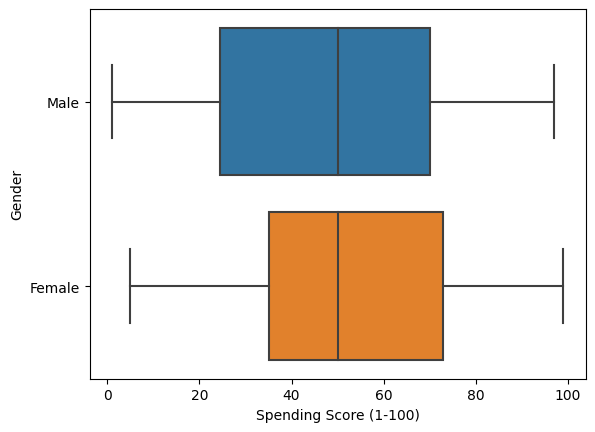

In [69]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in column:
    plt.figure()
    sns.boxplot(data=df,y='Gender',x=df[i]);
    

In [70]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

In [71]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

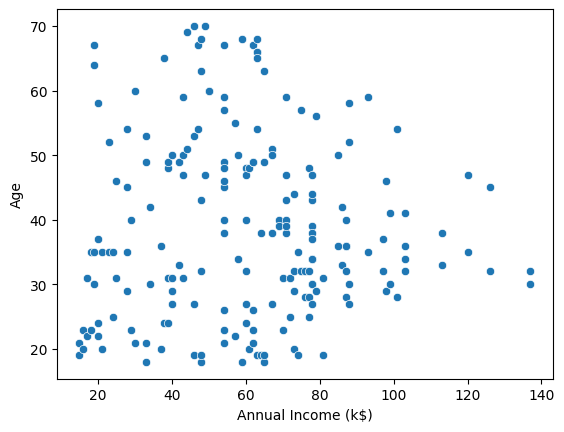

In [72]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Age')

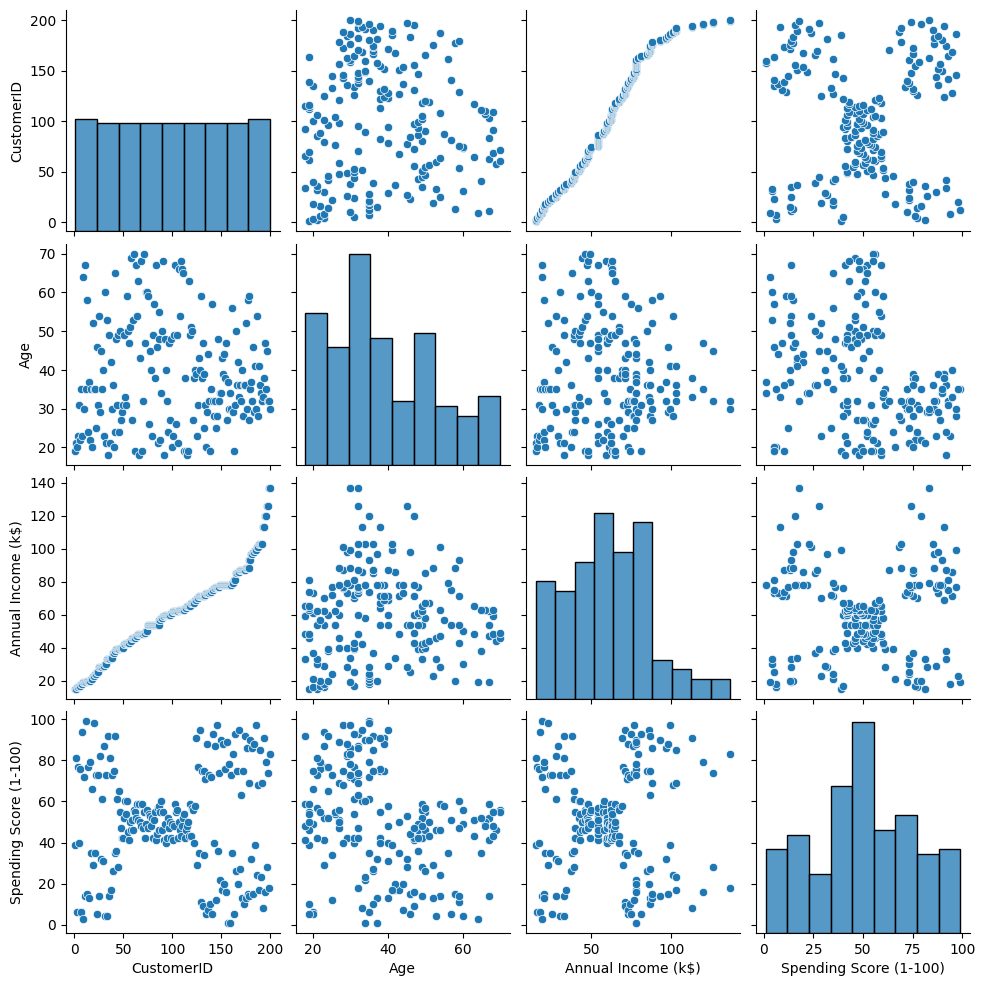

In [73]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df);

In [74]:
df.groupby('CustomerID')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19.0,15.0,39.0
2,21.0,15.0,81.0
3,20.0,16.0,6.0
4,23.0,16.0,77.0
5,31.0,17.0,40.0
...,...,...,...
196,35.0,120.0,79.0
197,45.0,126.0,28.0
198,32.0,126.0,74.0


In [75]:
df.groupby('Gender')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


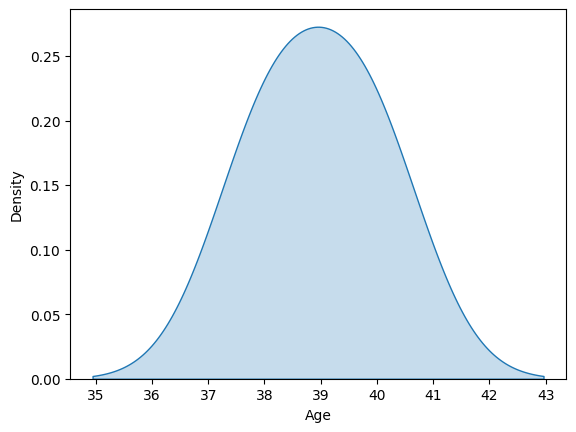

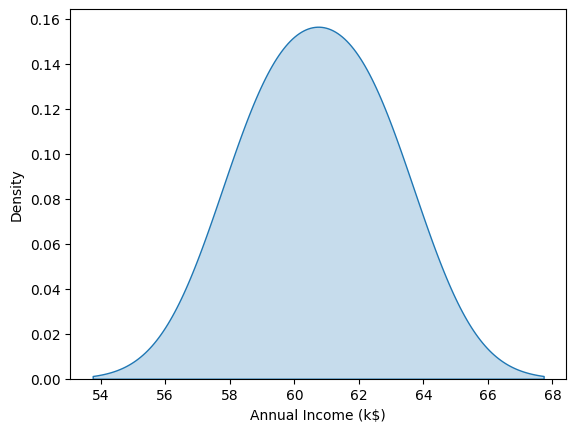

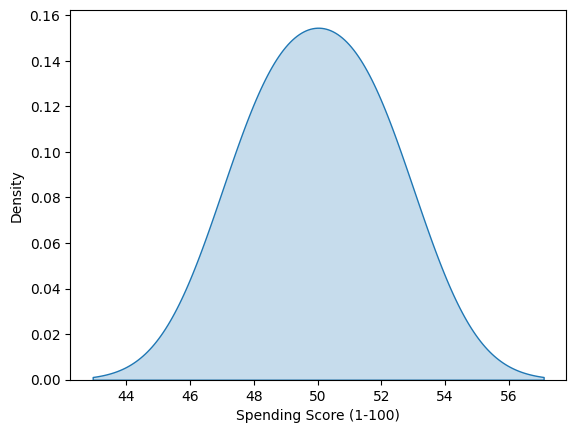

In [76]:
c= ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in c:
    plt.figure()
    sns.kdeplot(df.groupby(['Gender'])[i].mean(),shade= True)

In [77]:
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [78]:
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')


In [79]:
correlation_matrix = df.corr()


In [80]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,NaN,-0.026763,0.977548,0.013835
Gender,NaN,NaN,NaN,NaN,NaN
Age,-0.026763,NaN,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,NaN,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,NaN,-0.327227,0.009903,1.000000


In [81]:
# Assuming 'correlation_matrix' is your correlation matrix DataFrame
correlation_matrix = correlation_matrix.drop(correlation_matrix.index[2])


In [82]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,NaN,-0.026763,0.977548,0.013835
Gender,NaN,NaN,NaN,NaN,NaN
Age,-0.026763,NaN,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,NaN,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,NaN,-0.327227,0.009903,1.000000


In [83]:
df= df.drop('Gender',axis=1)


In [84]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

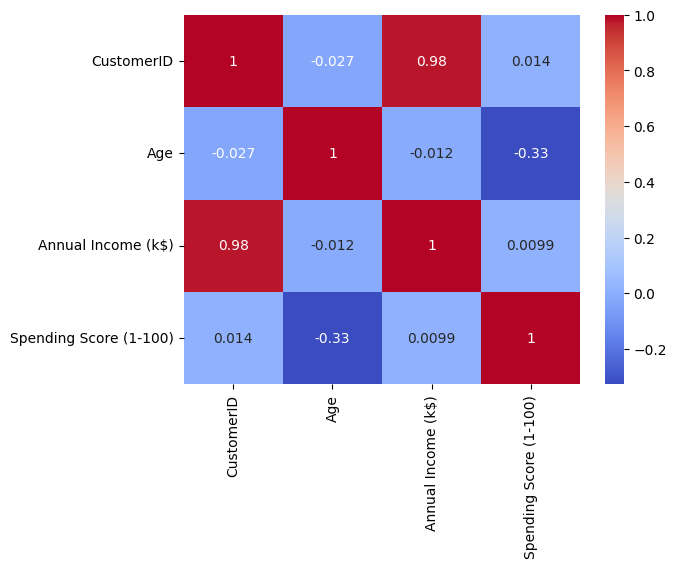

In [85]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering- Univariate, Bivariate, Multivariate

In [160]:
cluster1=KMeans(n_clusters=3)

In [161]:
 cluster1.fit(df[['Annual Income (k$)']])


KMeans(n_clusters=3)

In [162]:
cluster1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [163]:
df['Clusters of Income']=cluster1.labels_

In [164]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters of Income2,Clusters of Income,Spending and Income Cluster
0,1,Male,19,15,39,0,2,5
1,2,Male,21,15,81,0,2,0
2,3,Female,20,16,6,0,2,5
3,4,Female,23,16,77,0,2,0
4,5,Female,31,17,40,0,2,5


In [165]:
df['Clusters of Income'].value_counts()

Clusters of Income
1    92
2    72
0    36
Name: count, dtype: int64

In [166]:
cluster1.inertia_

23528.152173913055

In [185]:
inertia_score = []
X = np.array(df['Annual Income (k$)']).reshape(-1, 1)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_score.append(kmeans.inertia_)

In [194]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 23517.33093093093,
 13278.112713472488,
 8481.49619047619,
 5081.48466026727,
 3976.3583638583646,
 2836.1047619047636,
 2168.4787157287155,
 1763.6207792207795]

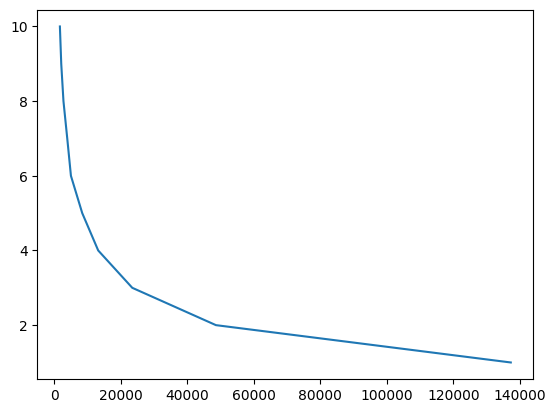

In [195]:
plt.plot(inertia_score,range(1,11))

In [190]:
df.groupby('Clusters of Income')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters of Income,,,
0,37.833333,99.888889,50.638889
1,39.184783,66.717391,50.054348
2,38.930556,33.027778,50.166667


In [191]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Clusters of Income',
       'Spending and Income Cluster'],
      dtype='object')

# Bivariate Clustering

In [221]:
cluster2= KMeans(n_clusters=5)
cluster2.fit(df[[ 'Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [222]:
cluster2.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [223]:
df['Spending and Income Cluster']=cluster2.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters of Income,Spending and Income Cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,0


In [224]:
inertia_score2= []
X = np.array(df[['Annual Income (k$)','Spending Score (1-100)']]).reshape(-1, 1)
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(X)
    inertia_score2.append(kmeans2.inertia_)

In [225]:
inertia_score2


[280714.24,
 96046.18506623844,
 45200.619729990736,
 27271.083028501656,
 18565.91725899862,
 12381.13137822534,
 8530.412108557564,
 6901.155862251101,
 5539.426477467027,
 4226.209893011928]

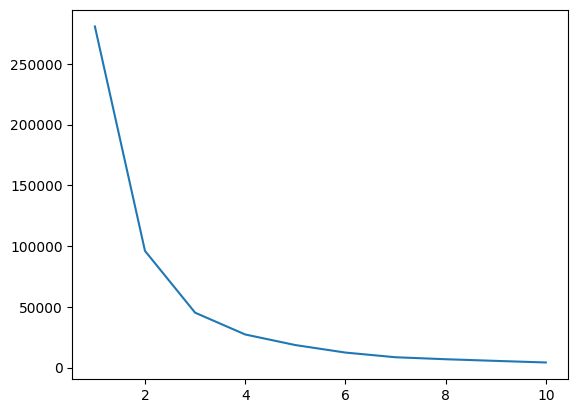

In [226]:
plt.plot(range(1,11),inertia_score2)

In [227]:
centers= pd.DataFrame(cluster2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,88.200000,17.114286
3,55.296296,49.518519
4,25.727273,79.363636


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

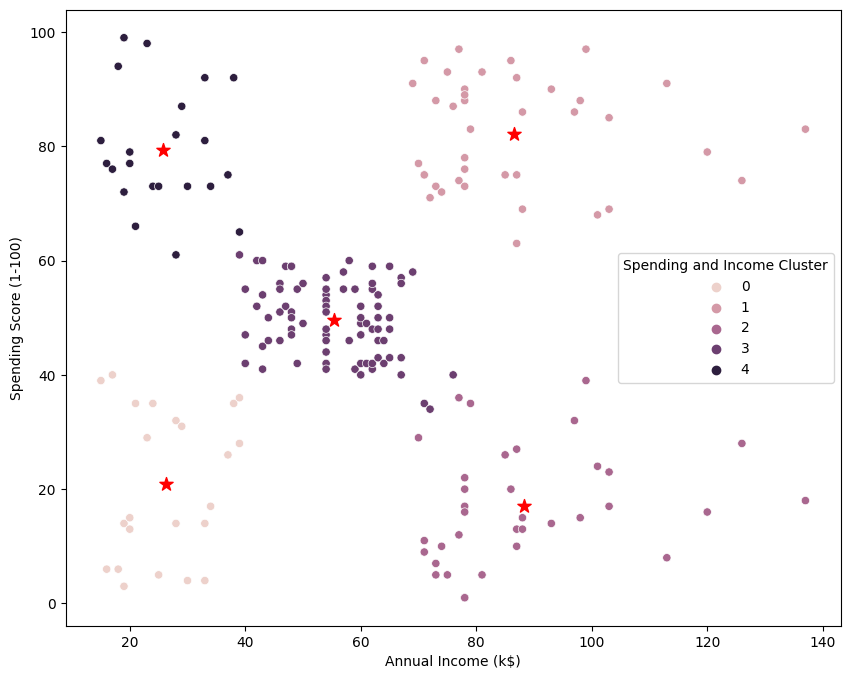

In [258]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='red',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster')

In [259]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.592593,0.407407
4,0.590909,0.409091


In [260]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636


# Multivariate Clustering 


In [261]:
from sklearn.preprocessing import StandardScaler


In [262]:
scale= StandardScaler()

In [263]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters of Income,Spending and Income Cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,0


In [264]:
#need to tuen male and female in numeric value
dff= pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters of Income,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,0,True
1,2,21,15,81,2,4,True
2,3,20,16,6,2,0,False
3,4,23,16,77,2,4,False
4,5,31,17,40,2,0,False


In [265]:

dff['Gender_Male']= dff['Gender_Male'].astype(int)

In [266]:
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters of Income,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,0,1
1,2,21,15,81,2,4,1
2,3,20,16,6,2,0,0
3,4,23,16,77,2,4,0
4,5,31,17,40,2,0,0


In [267]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Clusters of Income', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [268]:
dff= dff[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [269]:
dff= scale.fit_transform(dff)

In [270]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4
0,-1.723412,-1.424569,-1.738999,-0.434801,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,-0.886405


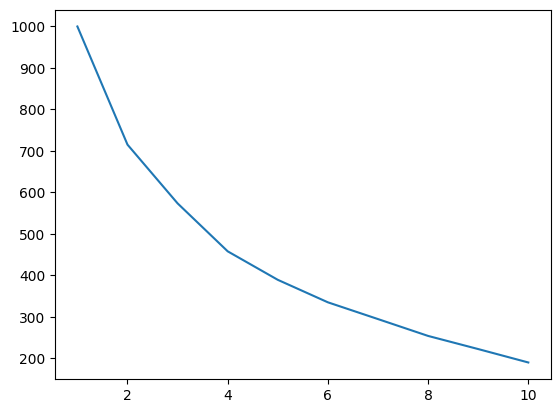

In [271]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [272]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters of Income,Spending and Income Cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,0,2
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,2


In [273]:
df.to_csv('Clustering.csv')